# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [3]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_39661/2602918946.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()


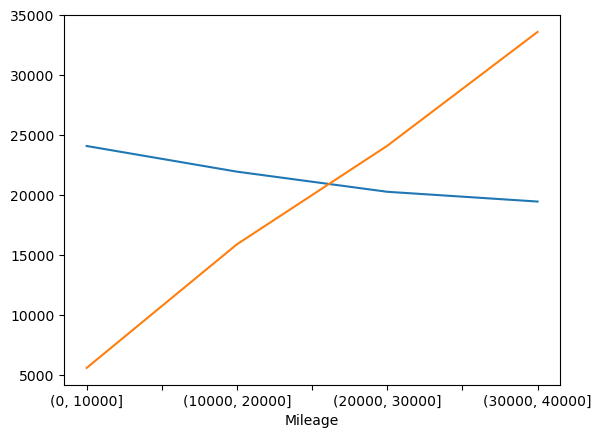

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
# pd.cut(df1['Mileage'],bins)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups)
groups['Price'].plot.line()
groups['Mileage'].plot.line()
plt.show()

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [26]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']
# print (X)
# print(y)

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
print(X)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)
print (X)

est = sm.OLS(y, X).fit()

print(est.summary())

      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]
     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results  

/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_39661/2110230960.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [35]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [32]:
scaled = scale.transform([[45000, 8, 4]])# mileage, cylinders, doors
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]


## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [40]:
ndf = pd.read_excel('cars2.xls')
ndf.head(30)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [41]:
XX = ndf[['Mileage', 'Cylinder', 'Doors']]
yy = ndf['Price']
yy.groupby(ndf.Doors).mean()

Doors
2    21633.157684
4    18188.557035
6    30963.621143
Name: Price, dtype: float64

In [42]:
import seaborn as sns
sns.set()

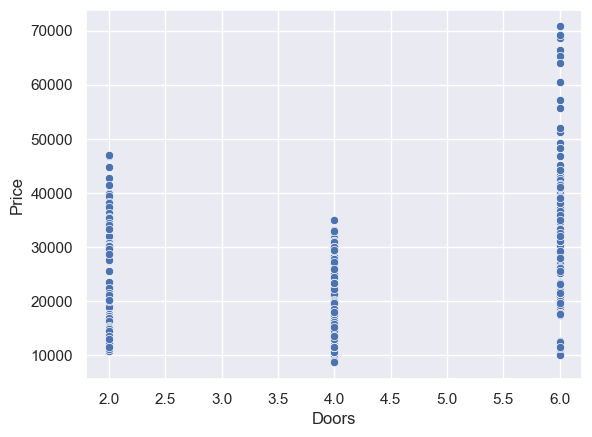

In [44]:
sns.scatterplot(x="Doors", y="Price", data=ndf)
plt.show()

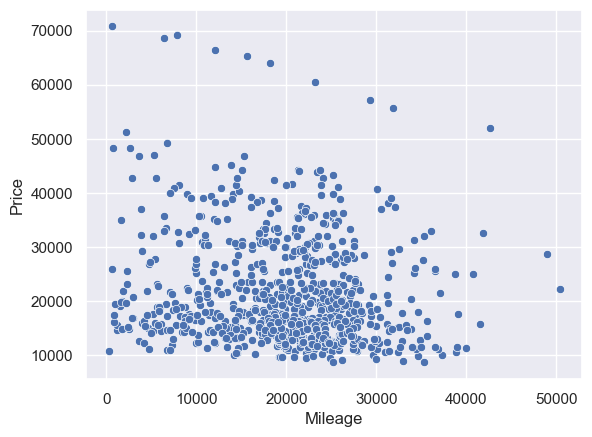

In [45]:
sns.scatterplot(x="Mileage", y="Price", data=ndf)
plt.show()

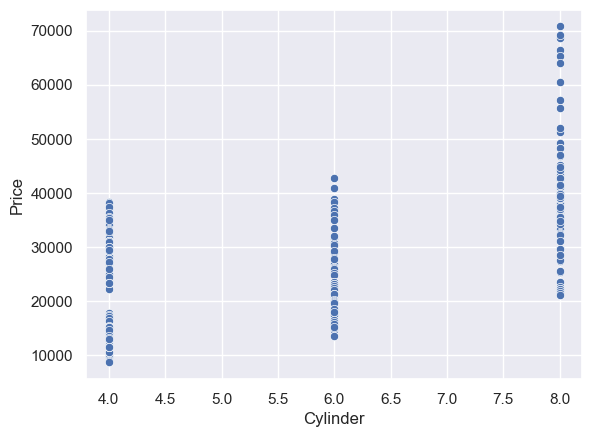

In [46]:
sns.scatterplot(x="Cylinder", y="Price", data=ndf)
plt.show()

In [51]:
XXX = ndf[['Mileage', 'Cylinder', 'Doors']]
yyy = ndf['Price']
# print (XXX)
# print(yyy)

XXX[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(XXX[['Mileage', 'Cylinder', 'Doors']].values)
# print(XXX)

# Add a constant column to our model so we can have a Y-intercept
XXX = sm.add_constant(XXX)
# print (XXX)

est2 = sm.OLS(yyy, XXX).fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     142.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.20e-74
Time:                        15:50:20   Log-Likelihood:                -8363.7
No. Observations:                 804   AIC:                         1.674e+04
Df Residuals:                     800   BIC:                         1.675e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    281.855     75.724      0.0

/var/folders/cd/nb9gspdn5hn_h2mv00dqs8nm0000gq/T/ipykernel_39661/2832643399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XXX[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(XXX[['Mileage', 'Cylinder', 'Doors']].values)


In [53]:
scaled2 = scale.transform([[65000, 6, 6]])# mileage, cylinders, doors
scaled2 = np.insert(scaled2[0], 0, 1) #Need to add that constant column in again.
print(scaled2)
predicted2 = est2.predict(scaled2)
print(predicted2)

[1.         5.51420435 0.52741047 1.62188068]
[18932.70571447]


In [55]:
np.corrcoef(XXX['Cylinder'], yyy)

array([[1.        , 0.56908614],
       [0.56908614, 1.        ]])

In [56]:
np.corrcoef(XXX['Doors'], yyy)

array([[1.       , 0.2738036],
       [0.2738036, 1.       ]])

In [57]:
np.corrcoef(XXX['Mileage'], yyy)

array([[ 1.        , -0.14305051],
       [-0.14305051,  1.        ]])